In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/dell/OneDrive - Universidad de Guayaquil/Analista de datos - Linkedin Learning/base_datos_2008.csv")

In [2]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [3]:
df.dropna(inplace=True,subset=["ArrDelay","DepDelay","Distance","AirTime"])

In [5]:
#ajusta el tamaño del grafico para una mejor visualizacion
sns.set(rc={'figure.figsize':(15,10)})

In [8]:
#creamos nuestro subset
df2=df[df.Origin.isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)

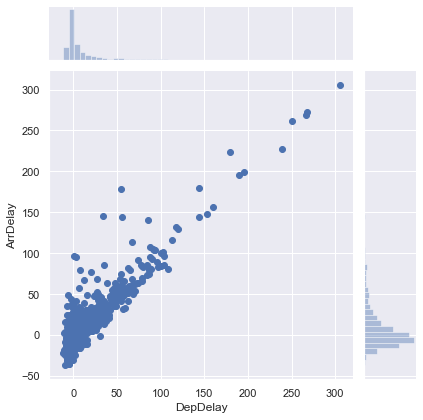

In [9]:
sns.jointplot(df2.DepDelay,df2.ArrDelay)

In [11]:
df3=df2[np.abs(df2.DepDelay<40)]

In [13]:
df3=df3[np.abs(df3.ArrDelay<40)]

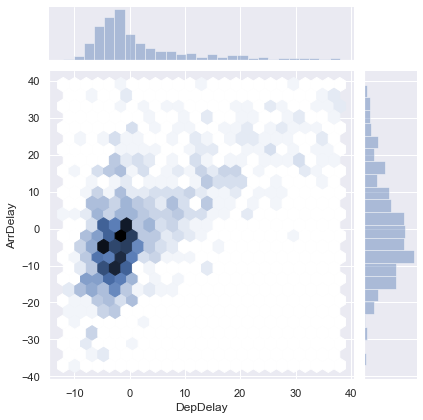

In [14]:
sns.jointplot(df3.DepDelay,df3.ArrDelay,kind="hex")

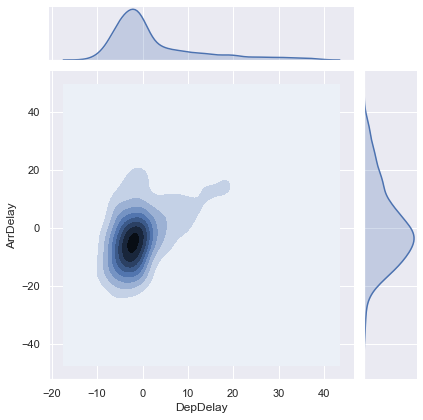

In [15]:
sns.jointplot(df3.DepDelay,df3.ArrDelay,kind="kde")

In [16]:
df2.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [19]:
#preparamos la data para graficar mapas de calor 

gb_df=pd.DataFrame(df2.groupby(["Origin","Month"],as_index=False)["DepDelay"].mean())

In [22]:
data=gb_df.pivot("Month","Origin","DepDelay")

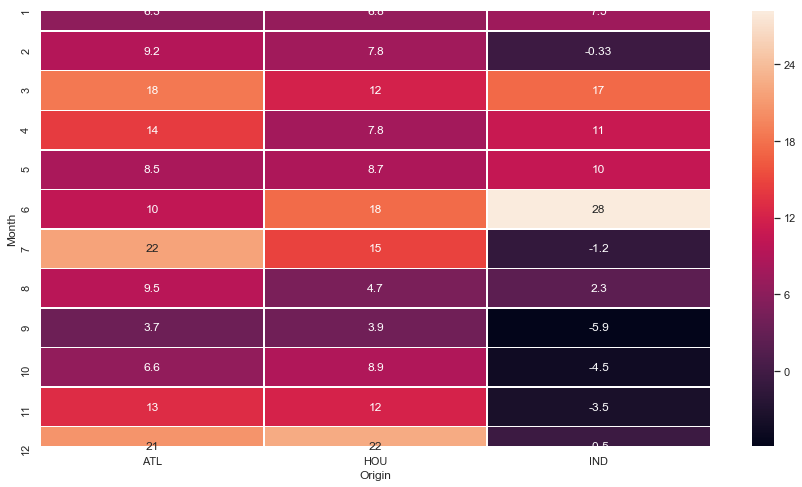

In [25]:
#ajusta el tamaño del grafico para una mejor visualizacion
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=data,annot=True,linewidths=.5)